## 使用tensorflow创建fashion-mnist数据集分类器


In [1]:
from utils import mnist_reader
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

### fashion-mnist数据集有10种类别，展示属于10个label中的一些图片

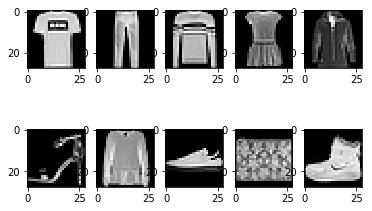

In [3]:
fig, axs = plt.subplots(2, 5)
images = []
for n in range(10):
    pic_index = np.argwhere(y_train == n)[0]
    images.append(axs[n//5,n%5].imshow(X_train[pic_index].reshape(28,28), cmap=plt.cm.gray))
plt.show()

### 预处理数据

In [4]:
from tensorflow.keras.utils import to_categorical

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train, X_valid = X_train[5000:], X_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)



In [5]:
print('{} and {}'.format(X_train.shape, y_train.shape))
print('{} and {}'.format(X_valid.shape, y_valid.shape))
print('{} and {}'.format(X_test.shape, y_test.shape))

(55000, 28, 28, 1) and (55000, 10)
(5000, 28, 28, 1) and (5000, 10)
(10000, 28, 28, 1) and (10000, 10)


In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Activation
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=[3, 3], input_shape=[28, 28, 1]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=[3, 3]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=[3, 3]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 13, 13, 16)        64        
_________________________________________________________________
activation_20 (Activation)   (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 32)          0         
__________

In [37]:
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

epochs = 30
batch_size = 100

checkpointer = ModelCheckpoint(filepath = 'saved_models/weights.best.from_scratch.hdf5', 
                               verbose = 1, save_best_only = True)
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid), 
          epochs=epochs, 
          batch_size=batch_size, 
          callbacks=[checkpointer], 
          verbose=1)


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54800/55000 [============================>.] - ETA: 0s - loss: 0.3646 - acc: 0.8686

In [35]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

# fashion_predict = [np.argmax(model.predict(np.expand_dims(img, axis=0))) for img in X_test]

# test_accuracy = 100 * np.sum(np.array(fashion_predict) == np.argmax(y_test, axis=1))/len(fashion_predict)
print(model.evaluate(X_test, y_test, verbose=0))
# print(test_accuracy)

[0.31014002554416659, 0.88419999999999999]


[0.30782637929916384, 0.88719999999999999]
